In [1]:
import numpy as np
import common_functions
from scipy.ndimage import rotate
import multiprocessing
import sys
import skimage as sk
import tifffile as tiff
import warnings
from functools import partial
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import norm
import statistics
from copy import copy
from scipy import ndimage as ndi

In [2]:
time_dome = str(3)
folder_and_dome = str('./../../../../Desktop/dome70_tp'+time_dome+'_fallingline/70_denoised_tp')
wd = folder_and_dome + time_dome

In [3]:
image = sk.io.imread(wd+'.tif')
image_r = common_functions.get_image_r(image)

total_dots = sk.io.imread(wd+'_apical_dots_total_1.tif')
total_dots_r = common_functions.get_image_r(total_dots)

In [4]:
gaussian = common_functions.get_3D_gaussian(total_dots)

In [5]:
skeleton = sk.morphology.skeletonize_3d(gaussian)

In [6]:
tiff.imwrite(wd+'_apical_dots_total_gaussian_1_skeleton3d.tif', skeleton)

: 

In [27]:
edt = ndi.distance_transform_edt(common_functions.reverse_values(skeleton))

In [28]:
tiff.imwrite(wd+'_apical_dots_total_gaussian_1_skeleton3d_edt.tif', edt)

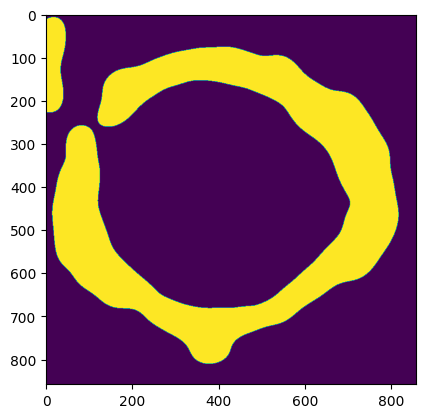

In [38]:
solid_gaussian = copy(gaussian)

### TEMPORAL
solid_gaussian[solid_gaussian < (solid_gaussian.mean())] = 0 ### set the good gamma or threshold to get solid gamma
solid_gaussian[solid_gaussian > 0] = 1
### TEMPORAL

plt.imshow(solid_gaussian[350])

tiff.imwrite(wd+'_apical_dots_total_gaussian_1_solid.tif', solid_gaussian)

In [35]:
solid_gaussian = sk.io.imread(wd+'_apical_dots_total_gaussian_1_solid.tif')

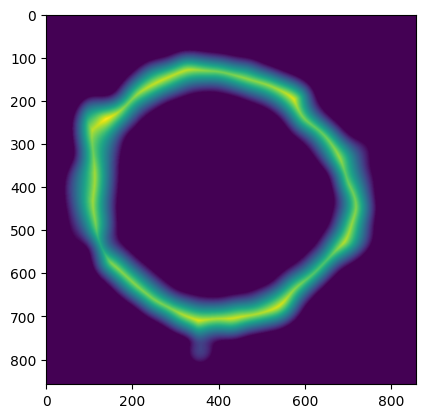

In [36]:
edt_3d = ndi.distance_transform_edt(solid_gaussian)

plt.imshow(edt_3d[300])

In [37]:
tiff.imwrite(wd+'_apical_dots_total_gaussian_1_edt.tif', edt_3d)
